# Running chemical reactions for a single molecule under vibrational strong coupling

Although preparing a single molecule under vibrational strong coupling (VSC) is very hard experimentally, we can use this extreme case as a first example to explore how to simulate **chemical reactions under VSC with CavMD**.

## 1. Packages requirement

### a. Psi4 for python

This code is necessary because we will run first-principles calculations for an arbitrary molecule under VSC.

Please check https://psicode.org/installs/v161/ to install psi4 for python. For all the installation methods provided in this web page, it seems installing with **INSTALLER** leads to a much faster code than **CONDA**, so please try **INSTALLER** if you can. If you succeed, you should be able to do "import psi4" in python:

In [1]:
import psi4
psi4.__version__

'1.4'

See? It works!

### b. Modified i-pi package for CavMD

Please check https://github.com/TaoELi/cavity-md-ipi/tree/master/tutorials#installation for how to "install" i-pi. You do not need to install LAMMPS because we will run first-principles calculations. If you succeed, you should be able to call i-pi by "which i-pi" from the terminal:

In [2]:
! which i-pi

/home/tao/Documents/GitData/cavity-md-ipi/i-pi-master-py3/bin/i-pi


Note that in jupyter notebook, we need to add "!" in front of the normal terminal command.

Then we are all set!


## 2. Isomerization reaction for CH<sub>2</sub>O &harr; CHOH

As an example, below we will investigate the VSC effect on the isomerization reaction between CH<sub>2</sub>O and CHOH. The transition state for this reaction looks like follows
<img src="ts.png" alt="drawing" width="150"/>
For this transition state, a proton (upper white ball) is attached to both the carbon (gray ball) and oxygen (red ball) atoms. This transferred proton can either be closer to the carbon atom, leading to the formation of the CH<sub>2</sub>O molecule, or be closer to the oxygen atom, leading to the formation of the CHOH molecule. 

The 2D potential energy surface of this molecule can be plotted as below. This 2D surface is plotted by scanning the molecular energy at different OH and CH distances while leaving all the other degrees of freedom relaxed to their optimized configuration. The calculation is performed under the **Hartree-Fock/6-31G\*** level.

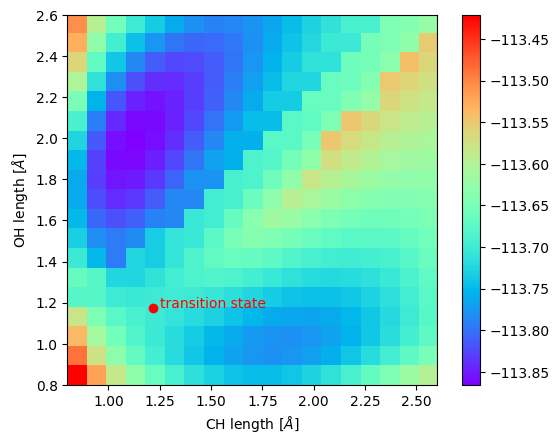

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import NearestNDInterpolator

# First, we construct the 2D potential energy surface of the isomerization reaction CH2O <-> CHOH
data = np.loadtxt("reaction_data/2d_pes.txt")
pes_data = data[:, 2]
nlength = int(np.size(pes_data)**(0.5))
pes_data = np.reshape(pes_data, (nlength, nlength))
mask = np.where(~np.isnan(pes_data))
interp = NearestNDInterpolator(np.transpose(mask), pes_data[mask])
pes_data = interp(*np.indices(pes_data.shape))

# We then plot the 2D potential energy surface
fig, ax = plt.subplots(ncols=1)
pes = ax.imshow(pes_data.transpose(), extent=[0.8, 2.8, 0.8, 2.8], origin='lower', cmap='rainbow')
ax.set_xlabel("CH length [$\AA$]")
ax.set_ylabel("OH length [$\AA$]")
fig.colorbar(pes, ax=ax)
ax.set_xlim(0.8, 2.6)
ax.set_ylim(0.8, 2.6)
ax.scatter(1.2191596, 1.1738894, color="r")
ax.text(1.2491596, 1.1738894, "transition state", color="r")
plt.show()

## 3. Running simulations inside the cavity

Below we will run CavMD simulations and see what would happen by coupling this transition-state molecule to a IR cavity mode with frequency $\omega_c = 1000$ cm<sup>-1</sup>.

Let's first see what files do we have in the current folder:

In [4]:
ls

input_psi4_incav.xml  reaction_data/                      ts_opt_incav_6e-3.xyz
photon_params.json    single_molecule_reaction_vsc.ipynb  ts.png


Before going through the details, let's first run a first-principles CavMD simulation under the **Hartree-Fock/6-31G\*** level for 200 time steps. Each time step should take less than 2 seconds. This can be done simply by running the following terminal command:

In [5]:
! i-pi input_psi4_incav.xml


 ____       ____       ____       ____
/    \     /    \     /    \     /    \ 
|  #################################  |
\__#_/     \____/     \____/     \_#__/
   #    _        _______  _____    #
   #   (_)      |_   __ \|_   _|   #      -*-     v 2.0    -*-
   #   __  ______ | |__) | | |     #
   Y  [  ||______||  ___/  | |     #      A Universal Force Engine
  0 0  | |       _| |_    _| |_    #      
   #  [___]     |_____|  |_____|   #
 __#_       ____       ____       _#__
/  # \     /    \     /    \     / #  \ 
|  #################################  |
\____/     \____/     \____/     \____/

    
 # @simulation: Fetchingffcavph
### Initialise many photon modes from photon_params.json ###
set fundamental photon with effective mass 1.000 a.u.
set fundamental photon freq as 1000.000 cm-1
set fundamental photon E-field magnitude as 6.000E-03
The system has 1 * 2 photon modes
set photon freqs as [cm-1]:
[1000. 1000.]
set photon E-field magnitudes as
[0.006 0.006]
## have not set init

mux = -0.505290 muy = -0.041907 muz = 0.070056 [units of a.u.]
 # Average timings at MD step      30. t/step: 1.93766e+00
mux = -0.495257 muy = -0.042136 muz = 0.073607 [units of a.u.]
 # Average timings at MD step      31. t/step: 1.87162e+00
mux = -0.496816 muy = -0.047663 muz = 0.078978 [units of a.u.]
 # Average timings at MD step      32. t/step: 1.77488e+00
mux = -0.510933 muy = -0.058544 muz = 0.086690 [units of a.u.]
 # Average timings at MD step      33. t/step: 1.93184e+00
mux = -0.534898 muy = -0.073196 muz = 0.096419 [units of a.u.]
 # Average timings at MD step      34. t/step: 2.16788e+00
mux = -0.559201 muy = -0.085117 muz = 0.104236 [units of a.u.]
 # Average timings at MD step      35. t/step: 1.78925e+00
mux = -0.576761 muy = -0.089553 muz = 0.107300 [units of a.u.]
 # Average timings at MD step      36. t/step: 1.76385e+00
mux = -0.586634 muy = -0.087066 muz = 0.105006 [units of a.u.]
 # Average timings at MD step      37. t/step: 2.09879e+00
mux = -0.591760 muy = -0

mux = -1.361708 muy = -0.119580 muz = 0.176112 [units of a.u.]
 # Average timings at MD step      98. t/step: 1.72989e+00
mux = -1.364087 muy = -0.124583 muz = 0.170900 [units of a.u.]
 # Average timings at MD step      99. t/step: 1.73488e+00
mux = -1.359263 muy = -0.127002 muz = 0.176514 [units of a.u.]
 # Average timings at MD step     100. t/step: 1.72786e+00
mux = -1.346509 muy = -0.126890 muz = 0.191935 [units of a.u.]
 # Average timings at MD step     101. t/step: 1.84157e+00
mux = -1.324205 muy = -0.124058 muz = 0.215691 [units of a.u.]
 # Average timings at MD step     102. t/step: 1.76496e+00
mux = -1.293929 muy = -0.119409 muz = 0.242599 [units of a.u.]
 # Average timings at MD step     103. t/step: 1.72147e+00
mux = -1.260114 muy = -0.113364 muz = 0.266881 [units of a.u.]
 # Average timings at MD step     104. t/step: 2.33739e+00
mux = -1.228471 muy = -0.106948 muz = 0.282898 [units of a.u.]
 # Average timings at MD step     105. t/step: 1.97694e+00
mux = -1.205940 muy = -0

mux = -0.728444 muy = 0.199358 muz = 0.125847 [units of a.u.]
 # Average timings at MD step     166. t/step: 2.26723e+00
mux = -0.750290 muy = 0.213505 muz = 0.121423 [units of a.u.]
 # Average timings at MD step     167. t/step: 1.78145e+00
mux = -0.781722 muy = 0.221174 muz = 0.099809 [units of a.u.]
 # Average timings at MD step     168. t/step: 2.07186e+00
mux = -0.818496 muy = 0.223385 muz = 0.065250 [units of a.u.]
 # Average timings at MD step     169. t/step: 2.00384e+00
mux = -0.854150 muy = 0.222606 muz = 0.023801 [units of a.u.]
 # Average timings at MD step     170. t/step: 1.94052e+00
mux = -0.885273 muy = 0.219383 muz = -0.020008 [units of a.u.]
 # Average timings at MD step     171. t/step: 2.03675e+00
mux = -0.908759 muy = 0.214190 muz = -0.064663 [units of a.u.]
 # Average timings at MD step     172. t/step: 1.63227e+00
mux = -0.922647 muy = 0.207999 muz = -0.107652 [units of a.u.]
 # Average timings at MD step     173. t/step: 2.88035e+00
mux = -0.925925 muy = 0.19973

## 4. Analyzing simulation results inside the cavity

After a few minutes, we finished our first-principles CavMD simulations. The molecular trajectory will be output as **simu_incav.xc.xyz**. This is a standard xyz file, and we can use a python library [MDAnalysis](https://www.mdanalysis.org/pages/installation_quick_start/) to plot the molecular trajectory on top of the potential energy surface we have observed above.

try to load simu_incav.xc.xyz
In simu_incav.xc.xyz nframes = 201


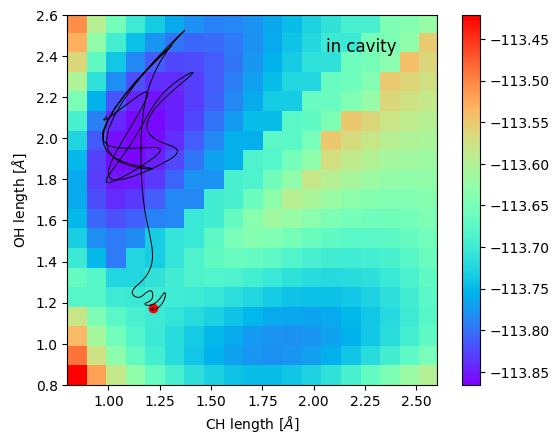

In [7]:
import MDAnalysis as mda
# Now, let's plot the MD trajectory on top of this fancy 2D potential energy surface
def analysis_single_traj(xyz_filename, color="k", label="in cavity"):
    # try to load the xyz file using MDA
    traj = mda.Universe("reaction_data/topology.xyz", xyz_filename)
    frames = traj.trajectory
    nframes = len(frames)
    print("In %s nframes = %d" %(xyz_filename, nframes))
    R_CH_traj, R_OH_traj = [], []
    for idx, ts in enumerate(frames):
        current_coord = ts._pos.copy()
        R_CH = np.sqrt(np.sum((current_coord[0,:] - current_coord[2,:])**2))
        R_OH = np.sqrt(np.sum((current_coord[1,:] - current_coord[2,:])**2))
        R_CH_traj.append(R_CH)
        R_OH_traj.append(R_OH)
    R_CH_traj = np.array(R_CH_traj)
    R_OH_traj = np.array(R_OH_traj)
    # Plot the 2D potential energy surface + the MD trajectory
    fig, ax = plt.subplots(ncols=1)
    pes = ax.imshow(pes_data.transpose(), extent=[0.8, 2.8, 0.8, 2.8], origin='lower', cmap='rainbow')
    ax.set_xlabel("CH length [$\AA$]")
    ax.set_ylabel("OH length [$\AA$]")
    fig.colorbar(pes, ax=ax)
    # plot trajectory
    ax.plot(R_CH_traj, R_OH_traj, color=color, lw=0.7)
    ax.scatter(R_CH_traj[0], R_OH_traj[0], color="r")
    ax.text(0.7, 0.9, label, transform=ax.transAxes, fontsize=12, color=color)
    ax.set_xlim(0.8, 2.6)
    ax.set_ylim(0.8, 2.6)
    plt.show()

try:
    xyz_filename="simu_incav.xc.xyz"
    print("try to load %s" %xyz_filename)
    analysis_single_traj(xyz_filename=xyz_filename)
except:
    print("You have not run the simulation above! Using my data instead!")
    analysis_single_traj(xyz_filename="reaction_data/simu_incav.xc.xyz")

## 5. Analyzing simulation results outside the cavity


If we turn off the light-matter coupling, what the result would be? Without going through the details on how to set light-matter interactions (which will be explained below), let's first check the results!

In reaction_data/simu_outcav.xc.xyz nframes = 201


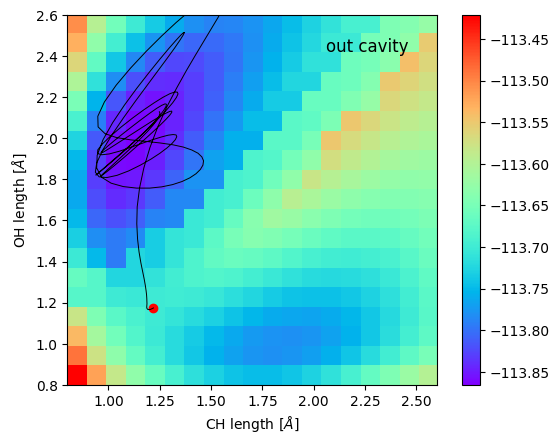

In [8]:
# What is the result if the molecule is decoupled from the cavity?

analysis_single_traj(xyz_filename="reaction_data/simu_outcav.xc.xyz", label="out cavity")

## 6. Dynamical caging effect of single-molecule vibrational strong coupling

Comparing the above two figures, we find that under single-molecule vibrational strong coupling, the molecular trajectory is more likely to be localized near the transition state. This so-called dynamical caging effect was first proposed by [Huo and coworkers](https://www.nature.com/articles/s41467-021-21610-9) in 2021.

In case if you are not convinced because I have just provided a single trajectory inside vs outside the cavity, let me show you the results of **64** trajectories.



There are 64 trajs in reaction_data/incav/


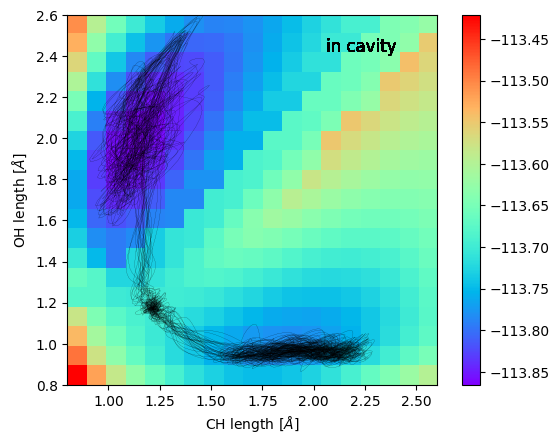

In [9]:
import glob 

def analysis_trajs(xyz_dir, color="k", label="in cavity"):
    xyz_files = glob.glob(xyz_dir + "/*.xyz")
    print("There are %d trajs in %s" %(len(xyz_files), xyz_dir))
    # 1. Plot the 2D potential energy surface 
    fig, ax = plt.subplots(ncols=1)
    pes = ax.imshow(pes_data.transpose(), extent=[0.8, 2.8, 0.8, 2.8], origin='lower', cmap='rainbow')
    ax.set_xlabel("CH length [$\AA$]")
    ax.set_ylabel("OH length [$\AA$]")
    fig.colorbar(pes, ax=ax)
    # 2. Plot many trajs
    for xyz_filename in xyz_files:
        traj = mda.Universe("reaction_data/topology.xyz", xyz_filename)
        frames = traj.trajectory
        nframes = len(frames)
        R_CH_traj, R_OH_traj = [], []
        for idx, ts in enumerate(frames):
            current_coord = ts._pos.copy()
            R_CH = np.sqrt(np.sum((current_coord[0,:] - current_coord[2,:])**2))
            R_OH = np.sqrt(np.sum((current_coord[1,:] - current_coord[2,:])**2))
            R_CH_traj.append(R_CH)
            R_OH_traj.append(R_OH)
        R_CH_traj = np.array(R_CH_traj)
        R_OH_traj = np.array(R_OH_traj)
    
        ax.plot(R_CH_traj, R_OH_traj, color=color, lw=0.1)
        ax.text(0.7, 0.9, label, transform=ax.transAxes, fontsize=12, color=color)
    ax.set_xlim(0.8, 2.6)
    ax.set_ylim(0.8, 2.6)
    plt.show()
    
analysis_trajs(xyz_dir="reaction_data/incav/", label="in cavity")

There are 64 trajs in reaction_data/outcav/


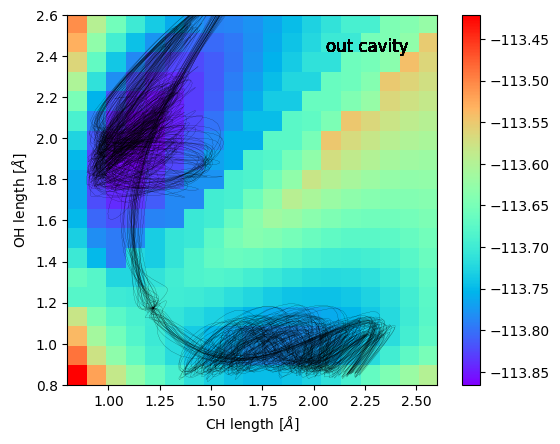

In [10]:
analysis_trajs(xyz_dir="reaction_data/outcav/", label="out cavity")

We clearly see that inside the cavity, the molecule prefers to stay near the transition state!

## 7. Let's dive into the technical details!

With the above exercise, we have learned that it is very easy to perform CavMD simulations for chemical reactions inside the cavity. Now, let me explain what we have simulated and how to prepare the input files.


### Theory of CavMD

For a molecular system coupled to a multi-mode cavity, CavMD propagates the following equations of motion:

$$M_{j}\ddot{\mathbf{R}}_{j} = \mathbf{F}_{j}^{(0)} - \sum_{k,\lambda}\left(\varepsilon_{k,\lambda} \widetilde{q}_{k,\lambda}+ \frac{\varepsilon_{k,\lambda}^2}{m_{k,\lambda} \omega_{k,\lambda}^2} d_{g,\lambda}\right)\frac{\partial d_{g, \lambda}}{\partial \mathbf{R}_{j}}$$
$$m_{k,\lambda}\ddot{\widetilde{q}}_{k,\lambda} = - m_{k,\lambda}\omega_{k,\lambda}^2\widetilde{q}_{k,\lambda} -\varepsilon_{k,\lambda} d_{g,\lambda}$$
            
Here, $M_{j}$ and $\mathbf{R}_{j}$ denote the mass and position vector for the $j$-th atom, $\mathbf{F}_{j}^{(0)}$ denotes the nuclear force without the cavity for atom $j$; $\varepsilon_{k,\lambda} = \sqrt{m_{\lambda}\omega_{\lambda}^2/\Omega\epsilon_0}$ denotes the  light-matter coupling strength between each molecule and the cavity mode. $\widetilde{q}_{k,\lambda}$,  $\omega_{k,\lambda}$, and $m_{k,\lambda}$ denote the momentum, position operator, frequency, and auxiliary mass for each cavity photon mode with wave vector $\mathbf{k}$ ($k = |\mathbf{k}|$) and polarization direction defined by a unit vector $\mathbf{\xi}_\lambda$ (with $\mathbf{\xi}_\lambda \cdot \mathbf{k} = 0$). $d_{\text{g},\lambda}$ denotes the ground-state molecular dipole  of the whole molecular subsystem projected along the polarization direction $\mathbf{\xi}_\lambda$.

Please check [our paper](https://doi.org/10.1073/pnas.2009272117) if you want to learn more about the fundamentals of CavMD.

### Parameters for our simulation

For our simulation, we have included one cavity mode with frequency $\omega_{c} = \omega_{k,\lambda} = 1000$ cm<sup>-1</sup>. This cavity mode takes two different polarization directions $\lambda = x, y$, because a realistic cavity has two polarization directions for each cavity mode with wave vector $k = |\mathbf{k}|$. The light-matter coupling strength is large, $\varepsilon_c = \varepsilon_{k,\lambda} = 6\times 10^{-3}$ a.u. (atomic units). The auxiliary mass of the cavity mode is set as $m_{c} = m_{k,\lambda} = 1$ a.u.

The initial geometry of the molecule is set as the transition state geometry, which has been shown at the very beginning of the tutorial. The initial position of the cavity mode is set in a way that the cavity mode is at the ground state, i.e., by setting

$$\widetilde{q}_{k,\lambda} = - \frac{\varepsilon_{k,\lambda}}{m_{k,\lambda} \omega_{k,\lambda}^2} d_{g,\lambda}$$

This setting is necessary. Because the ground-state molecular permanent dipole moment can be non-zero, if we just naively set $\widetilde{q}_{k,\lambda} = 0$ as the initial condition, we actually enforce an initial excitation of the photon mode when the light-matter coupling is non-zero. Please check [some recent papers](https://doi.org/10.1021/acs.jpclett.0c02399) if you are interested in this topic.

The initial velocities of all particles (atoms + photons) are sampled as a Maxwell-Boltzmann distribution at 300 K. A strong damping has been included for both molecules and photons with a lossy lifetime of 100 fs via a Langevin thermostat.

All these parameters are set in the following three input files:

#### a. ts_opt_incav_6e-3.xyz

The first file **ts_opt_incav_6e-3.xyz** includes the initial geometry for the molecule and the two cavity photons (same frequency but with two different polarization directions) in the units of Angstrom:

In [133]:
! cat ts_opt_incav_6e-3.xyz

6

  C   -0.33988713857019     -0.11343731593537      0.08066589156812
  O   0.84348333424583       0.26267170185831     -0.18151246530170
  H   -0.07357990588577      0.81646674565316     -0.66143160575659
  H   -0.43001628978987     -0.96570113157611      0.76227817949017
  L   61.34575610998162      0.00000000000000      0.00000000000000
  L   0.00000000000000       8.59063877913208      0.00000000000000


As can be seen, the cavity photons (labeled by L) polarized in the $x$-direction has an initial position of 61.34575610998162 due to the interaction with the permanent molecular dipole moment along the $x$-direction. When the light-matter coupling is changed from $\varepsilon_c = 6\times 10^{-3}$ a.u. to other values, this photon position needs to be modified by the equation above.

#### b. photon_params.json

The second file **photon_params.json** includes the definition of the cavity photon parameters. This file is necessary for a CavMD simulation.

In [134]:
! cat photon_params.json

{
  "apply_photon" : true,
  "eff_mass" : 1.0,
  "freqs_cm" : 1000.0,
  "E0" : 6e-3
}


Here, "eff_mass" is $m_{c} = 1$ a.u.; "freqs_cm" is $\omega_{c} = 1000$ cm<sup>-1</sup>, and "E0" is $\varepsilon_c  = 6\times 10^{-3}$ a.u. 

#### c. input_psi4_incav.xml

This final file controls the job of i-pi and reads as follows:
```xml
<simulation verbosity='high'>
  <output prefix='simu_incav'>
    <properties stride='1' filename='out'>  [ step, time{picosecond}, conserved{electronvolt}, temperature{kelvin}, kinetic_cv{electronvolt}, potential{electronvolt}] </properties>
    <trajectory filename='xc' stride='1' format='xyz'> x_centroid{angstrom} </trajectory>
    <checkpoint filename='checkpoint' stride='1' overwrite='True'/>
  </output>
  <total_steps>200</total_steps>
  <prng>
    <seed>846295</seed>
  </prng>
  <ffcavph name='psi4'>
      <input_xyz_filename> ts_opt_incav_6e-3.xyz </input_xyz_filename>
      <grad_method> hf/6-31g* </grad_method>
      <output_file> OUT_1.dat </output_file>
      <memory_usage> 4 gb </memory_usage>
      <numpy_memory> 2 </numpy_memory>
      <nthread> 1 </nthread>
  </ffcavph>
  <system>
    <initialize nbeads='1'>
      <file mode='xyz' units='angstrom'> ts_opt_incav_6e-3.xyz </file>
      <cell mode='manual' units='angstrom'>
	[242.92, 0, 0, 0, 242.92, 0, 0, 0, 242.92]
      </cell>
      <velocities mode='thermal' units='kelvin'> 300 </velocities>
    </initialize>
    <forces>
      <force forcefield='psi4'> </force>
    </forces>
    <motion mode='dynamics'>
      <dynamics mode='nvt'>
        <timestep units='femtosecond'> 0.5 </timestep>
        <thermostat mode='langevin'>
          <tau units='femtosecond'> 100 </tau>
        </thermostat>
      </dynamics>
    </motion>
    <ensemble>
      <temperature units='kelvin'> 300 </temperature>
    </ensemble>
  </system>
</simulation>
```

In this long xml file, the key control for CavMD is the following piece of the code:
```xml
  <ffcavph name='psi4'>
      <input_xyz_filename> ts_opt_incav_6e-3.xyz </input_xyz_filename>
      <grad_method> hf/6-31g* </grad_method>
      <output_file> OUT_1.dat </output_file>
      <memory_usage> 4 gb </memory_usage>
      <numpy_memory> 2 </numpy_memory>
      <nthread> 1 </nthread>
  </ffcavph>
```

where we have used a force evaluator **ffcavph** designed for CavMD and use **psi4** to calculate the gradients. Note that CavMD requires nuclear forces, dipole moment, and dipole derivatives, all of which are calculated by electronic structure theory.

#### Be caution!

- Initial geometry

In the xml file, there are two places needing the xyz initial geometry:
```xml
<input_xyz_filename> ts_opt_incav_6e-3.xyz </input_xyz_filename>
<file mode='xyz' units='angstrom'> ts_opt_incav_6e-3.xyz </file>
```

Please set them the same!

- Initial velocities

Although in the xml file, we have set to sample velocities according to the Maxwell-Boltzmann distribution at 300 K. If you rerun the simulation, you cannot get a different geometry. This is because the seed of the random value generator is set to the following value:
```xml
  <prng>
    <seed>846295</seed>
  </prng>
```

If you want to have a different initial velocities, please change the above integer 846295 to another value.

## Citations

If you find this feature helpful for your research, please cite 

- Li, T. E., Hammes-Schiffer, S.  QM/MM Modeling of Vibrational Polariton Induced Energy Transfer and Chemical Dynamics. [J. Am. Chem. Soc. 2022, accepted](https://arxiv.org/abs/2212.02322). [additional code](https://github.com/TaoELi/cavmd_examples_qmmm)

If you directly use the code, please also cite the original i-pi and psi4 paper:

- Kapil, V., Rossi, M., Marsalek, O., Petraglia, R., Litman, Y., Spura, T., … Ceriotti, M., I-PI 2.0: A universal force engine for advanced molecular simulations. [Comput. Phys. Commun., 2019, 236, 214–223.](https://doi.org/10.1016/j.cpc.2018.09.020)


- Smith, D. G. A., Burns, L. A., Simmonett, A. C., Parrish, R. M., Schieber, M. C., Galvelis, R., … Sherrill, C. D. (2020). Psi4 1.4: Open-source software for high-throughput quantum chemistry. The Journal of Chemical Physics, 152(18), 184108. https://doi.org/10.1063/5.0006002
